In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# 2️⃣ Load Dataset
data = pd.read_csv("/content/supply_chain_data.csv")
print("Dataset shape:", data.shape)
print(data.head())

Dataset shape: (100, 24)
  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    M

In [ ]:
# 3️⃣ Drop rows with missing target values
target = "Number of products sold"
data = data.dropna(subset=[target])


In [ ]:
# 4️⃣ Handle Missing Values
# Numeric -> fill with median, Categorical -> fill with 'Unknown'
num_cols = data.select_dtypes(include=['int64','float64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

for col in num_cols:
    data[col] = data[col].fillna(data[col].median())

for col in cat_cols:
    data[col] = data[col].fillna("Unknown")

In [ ]:
# 5️⃣ One-hot encode categorical columns
data = pd.get_dummies(data, columns=cat_cols)

In [ ]:

# 6️⃣ Define X and y
X = data.drop(columns=[target])
y = data[target]

In [ ]:
# 7️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 8️⃣ Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# 9️⃣ Neural Network Model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])


model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 🔟 Train Model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose=0)

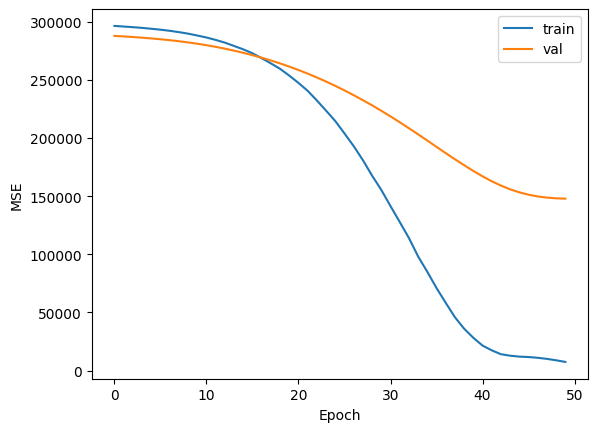

In [ ]:
# 📊 Plot Loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:

# 1️⃣1️⃣ Model Evaluation
preds = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, preds)
print(f"Test MSE: {mse:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
Test MSE: 126642.81


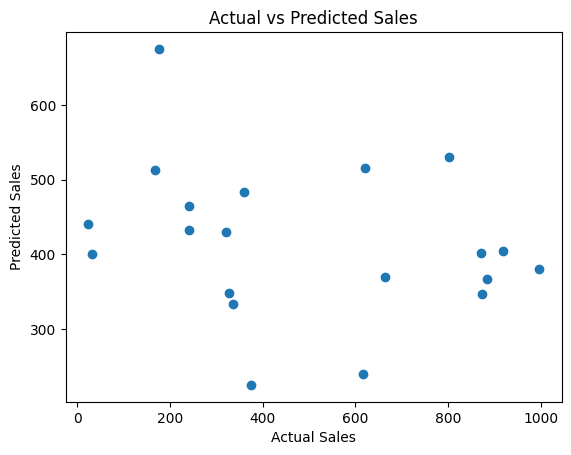

In [ ]:
# True vs Predicted Plot
plt.scatter(y_test, preds)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()



In [ ]:
# 1️⃣2️⃣ Save Model
model.save("demand_forecasting_model.h5")
print("Model saved as demand_forecasting_model.h5")

Model saved as demand_forecasting_model.h5
